To-Do List:

Interesting discussions to review
- https://www.kaggle.com/datasets/irakozekelly/fertilizer-prediction
- https://www.kaggle.com/code/swandipsingha/only-eda-that-you-need
- https://www.kaggle.com/competitions/playground-series-s5e6/discussion/582515

My ideas
- DYOR: Check the normal fertilizer selection process that farmers use.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
train_orig = pd.read_csv("playground-series-s5e6/train.csv")
test_orig = pd.read_csv("playground-series-s5e6/test.csv")
sample_submission = pd.read_csv("playground-series-s5e6/sample_submission.csv")

## Initial data inspection

In [3]:
# Copy dataset
train = train_orig.copy()

# View first rows to confirm data loaded correctly
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [4]:
# Get a summary of the df to check for missing values or incorrect data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [5]:
# Get the descriptive statistics for numerical columns
train.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


## Handle categorical features

In [6]:
# Get categorical names for non-numerical columns
print("Soil Types: {}".format(train['Soil Type'].unique()))
print("Crop Types: {}".format(train['Crop Type'].unique()))
print("Fertilizer Names: {}".format(train['Fertilizer Name'].unique()))

Soil Types: ['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']
Crop Types: ['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']
Fertilizer Names: ['28-28' '17-17-17' '10-26-26' 'DAP' '20-20' '14-35-14' 'Urea']


In [7]:
# Apply One-Hot Encoding to input 'Soil Type' and 'Crop Type'
df_encoded = pd.get_dummies(train, columns=['Soil Type', 'Crop Type'], drop_first=False)

print("\nDataFrame after One-Hot Encoding for input features:")
df_encoded.head()


DataFrame after One-Hot Encoding for input features:


,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,0,37,70,36,36,4,5,28-28,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,27,69,65,30,6,18,28-28,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,29,63,32,24,12,16,17-17-17,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,35,62,54,39,12,4,10-26-26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,35,58,43,37,2,16,DAP,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
print("\nDataFrame info after One-Hot Encoding:")
df_encoded.info()


DataFrame info after One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     750000 non-null  int64 
 1   Temparature            750000 non-null  int64 
 2   Humidity               750000 non-null  int64 
 3   Moisture               750000 non-null  int64 
 4   Nitrogen               750000 non-null  int64 
 5   Potassium              750000 non-null  int64 
 6   Phosphorous            750000 non-null  int64 
 7   Fertilizer Name        750000 non-null  object
 8   Soil Type_Black        750000 non-null  uint8 
 9   Soil Type_Clayey       750000 non-null  uint8 
 10  Soil Type_Loamy        750000 non-null  uint8 
 11  Soil Type_Red          750000 non-null  uint8 
 12  Soil Type_Sandy        750000 non-null  uint8 
 13  Crop Type_Barley       750000 non-null  uint8 
 14  Crop Type_Co

In [9]:
le = LabelEncoder()
df_encoded['Fertilizer Name_encoded'] = le.fit_transform(df_encoded['Fertilizer Name'])

print("\nMapping of Original 'Fertilizer Name' to Encoded Labels:")
for i, label in enumerate(le.classes_):
    print(f"'{label}' -> {i}")

target_encoded_names = ["10-26-26", "14-35-14", "17-17-17", "20-20", "28-28", "DAP", "Urea"]
target_encoded_vals = [0, 1, 2, 3, 4, 5, 6]


Mapping of Original 'Fertilizer Name' to Encoded Labels:
'10-26-26' -> 0
'14-35-14' -> 1
'17-17-17' -> 2
'20-20' -> 3
'28-28' -> 4
'DAP' -> 5
'Urea' -> 6


In [10]:
df_train = df_encoded.drop(columns=['Fertilizer Name', 'id'])

df_train.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name_encoded
0,37,70,36,36,4,5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,4
1,27,69,65,30,6,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
2,29,63,32,24,12,16,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,35,62,54,39,12,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,58,43,37,2,16,0,0,0,1,...,0,0,0,0,1,0,0,0,0,5


## EDA - Univariate Analysis

### Target


--- Target Variable: 'Fertilizer Name' Distribution ---
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: Fertilizer Name, dtype: int64


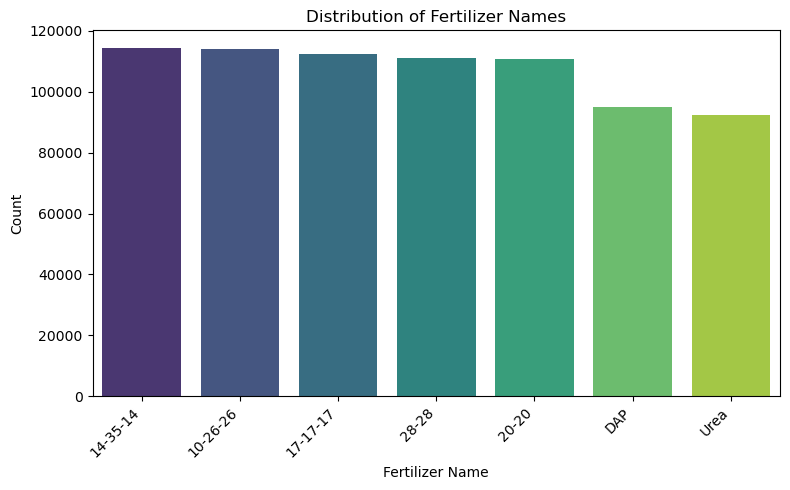

In [11]:
# Value counts of 'Fertilizer Name'
print("\n--- Target Variable: 'Fertilizer Name' Distribution ---")
fertilizer_counts = train['Fertilizer Name'].value_counts()
print(fertilizer_counts)

# Visualize: Bar plot of 'Fertilizer Name' counts
plt.figure(figsize=(8, 5))
sns.barplot(x=fertilizer_counts.index, y=fertilizer_counts.values, palette='viridis')
plt.title('Distribution of Fertilizer Names')
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Numerical Features


--- Summary Statistics for Numerical Features ---
         Temparature       Humidity       Moisture       Nitrogen  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       31.503565      61.038912      45.184147      23.093808   
std         4.025574       6.647695      11.794594      11.216125   
min        25.000000      50.000000      25.000000       4.000000   
25%        28.000000      55.000000      35.000000      13.000000   
50%        32.000000      61.000000      45.000000      23.000000   
75%        35.000000      67.000000      55.000000      33.000000   
max        38.000000      72.000000      65.000000      42.000000   

           Potassium    Phosphorous  
count  750000.000000  750000.000000  
mean        9.478296      21.073227  
std         5.765622      12.346831  
min         0.000000       0.000000  
25%         4.000000      10.000000  
50%         9.000000      21.000000  
75%        14.000000      32.000000  
max        19.000000   

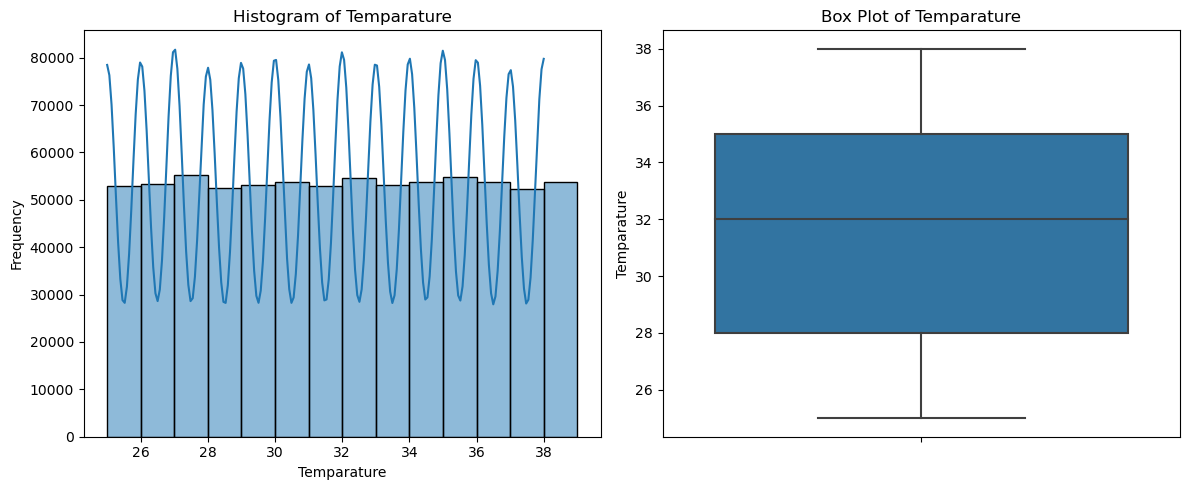


--- Analysis of Temparature ---
No obvious outliers detected in Temparature based on 1.5*IQR rule.
Range: 25 to 38
Mean: 31.50, Median: 32.0
Skewness: -0.00


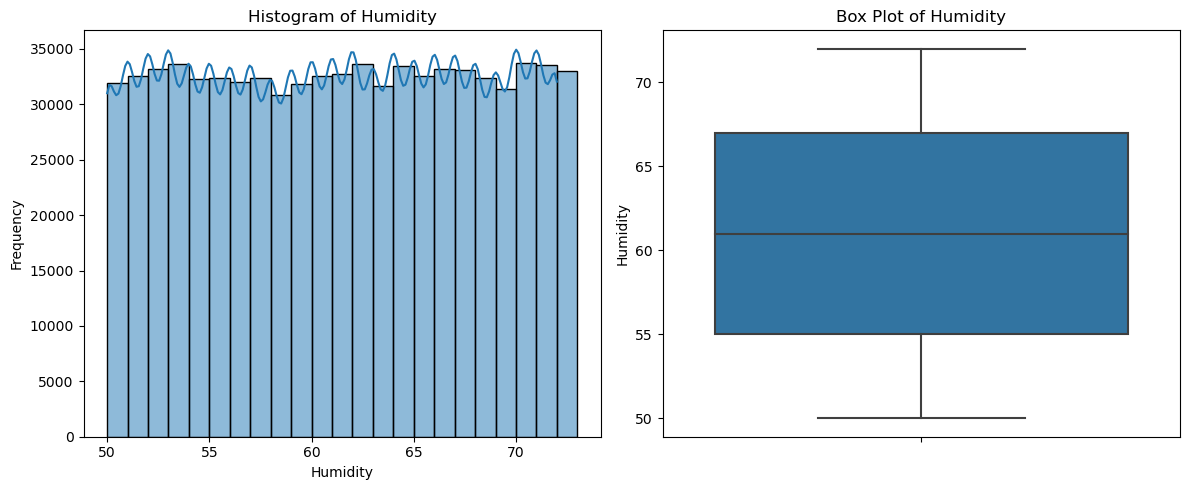


--- Analysis of Humidity ---
No obvious outliers detected in Humidity based on 1.5*IQR rule.
Range: 50 to 72
Mean: 61.04, Median: 61.0
Skewness: -0.01


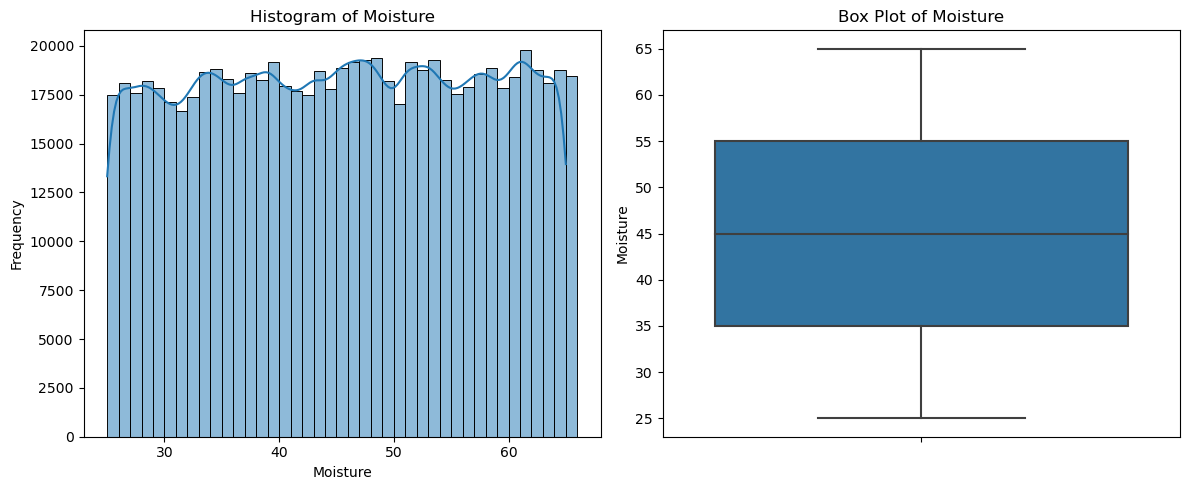


--- Analysis of Moisture ---
No obvious outliers detected in Moisture based on 1.5*IQR rule.
Range: 25 to 65
Mean: 45.18, Median: 45.0
Skewness: -0.02


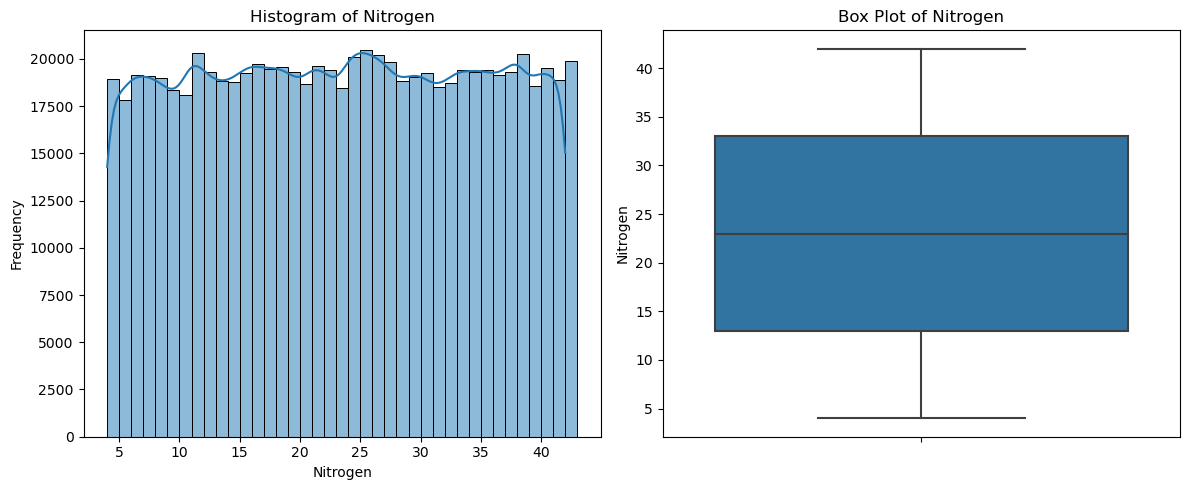


--- Analysis of Nitrogen ---
No obvious outliers detected in Nitrogen based on 1.5*IQR rule.
Range: 4 to 42
Mean: 23.09, Median: 23.0
Skewness: -0.01


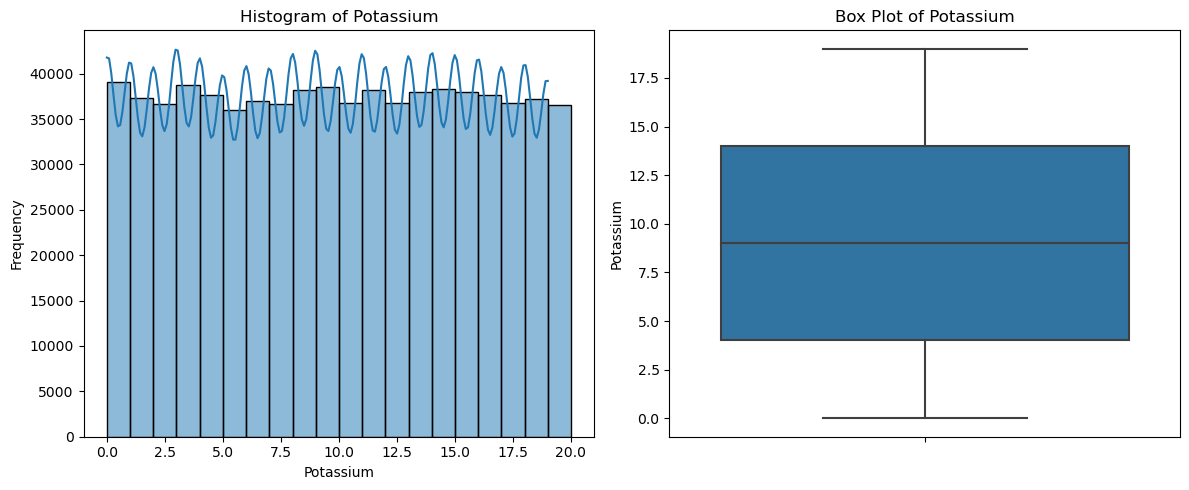


--- Analysis of Potassium ---
No obvious outliers detected in Potassium based on 1.5*IQR rule.
Range: 0 to 19
Mean: 9.48, Median: 9.0
Skewness: -0.00


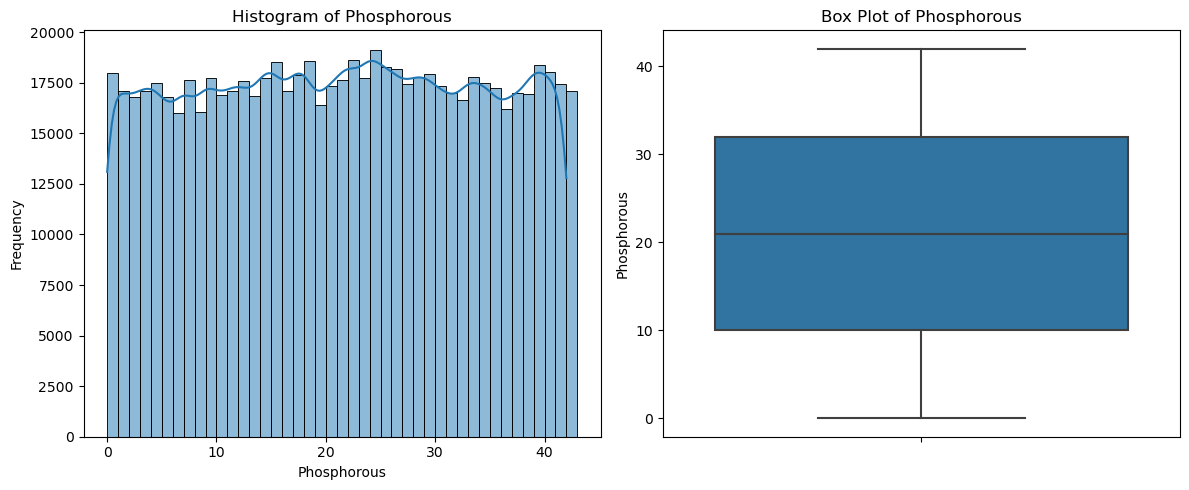


--- Analysis of Phosphorous ---
No obvious outliers detected in Phosphorous based on 1.5*IQR rule.
Range: 0 to 42
Mean: 21.07, Median: 21.0
Skewness: -0.01


In [12]:
numerical_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# Summary statistics
print("\n--- Summary Statistics for Numerical Features ---")
print(train[numerical_cols].describe())

# Histograms and Box Plots for each numerical feature
print("\n--- Visualizing Numerical Feature Distributions ---")
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(train[col], kde=True, bins=range(int(train[col].min()), int(train[col].max()) + 2))
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(y=train[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    print(f"\n--- Analysis of {col} ---")
    # Quick check for potential outliers based on IQR (for more detail, use IQR method)
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]

    if not outliers.empty:
        print(f"Potential outliers detected in {col} (values outside 1.5*IQR): {outliers[col].tolist()}")
    else:
        print(f"No obvious outliers detected in {col} based on 1.5*IQR rule.")
    print(f"Range: {train[col].min()} to {train[col].max()}")
    print(f"Mean: {train[col].mean():.2f}, Median: {train[col].median()}")
    print(f"Skewness: {train[col].skew():.2f}") # Positive skew > 0, Negative skew < 0, Symmetric ~ 0

### Categorical Features


--- Categorical Features Distribution ---

Value counts for 'Soil Type':
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: Soil Type, dtype: int64


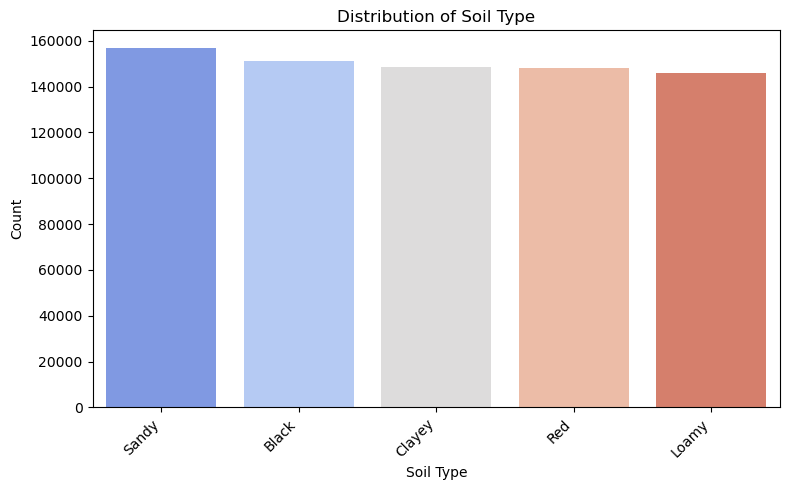


--- Analysis of Soil Type ---
Unique categories: ['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']

Value counts for 'Crop Type':
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: Crop Type, dtype: int64


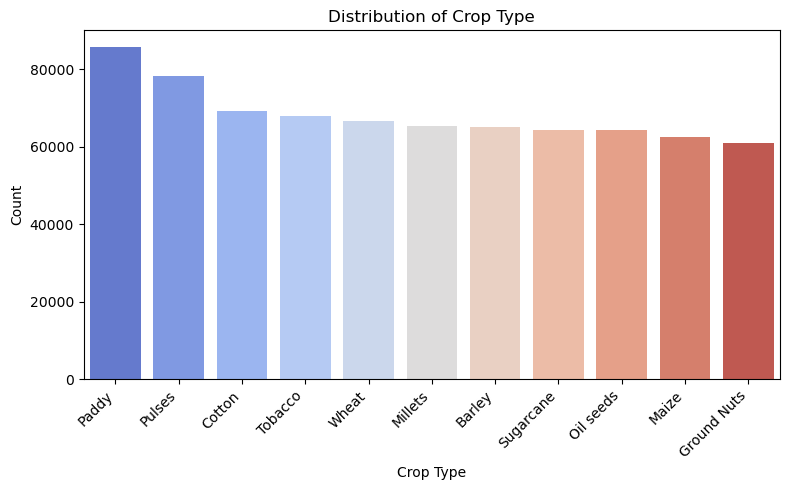


--- Analysis of Crop Type ---
Unique categories: ['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']


In [13]:
# List columns containing categorical features
categorical_cols = ['Soil Type', 'Crop Type']

# Plot & print counts of categorical features
print("\n--- Categorical Features Distribution ---")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    counts = train[col].value_counts()
    print(counts)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"\n--- Analysis of {col} ---")
    print(f"Unique categories: {train[col].unique()}")

## EDA - Multivariate Analysis

### Correlation Matrix (Numerical)


--- Correlation Matrix of Numerical Features ---
             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.001758 -0.001633 -0.006073  -0.009913     0.000298
Humidity        0.001758  1.000000  0.003424  0.006502   0.005229     0.002413
Moisture       -0.001633  0.003424  1.000000  0.003016  -0.001931    -0.006735
Nitrogen       -0.006073  0.006502  0.003016  1.000000   0.000543    -0.005464
Potassium      -0.009913  0.005229 -0.001931  0.000543   1.000000     0.000113
Phosphorous     0.000298  0.002413 -0.006735 -0.005464   0.000113     1.000000


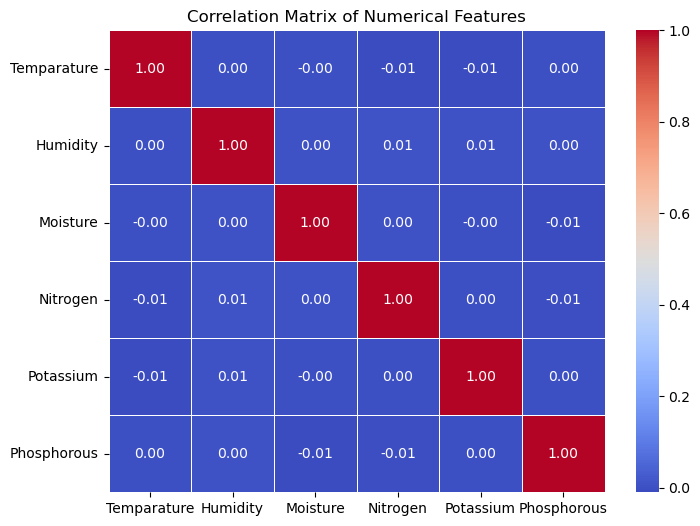

In [14]:
numerical_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

print("\n--- Correlation Matrix of Numerical Features ---")
correlation_matrix = train[numerical_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Numerical Features vs. Target


--- Numerical Features vs. Target Variable ('Fertilizer Name') ---


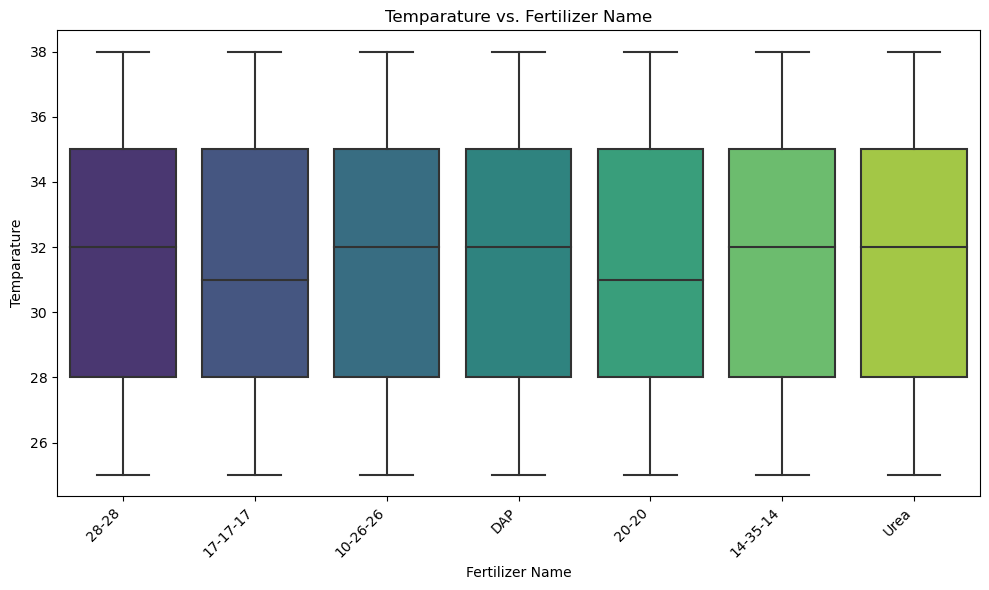

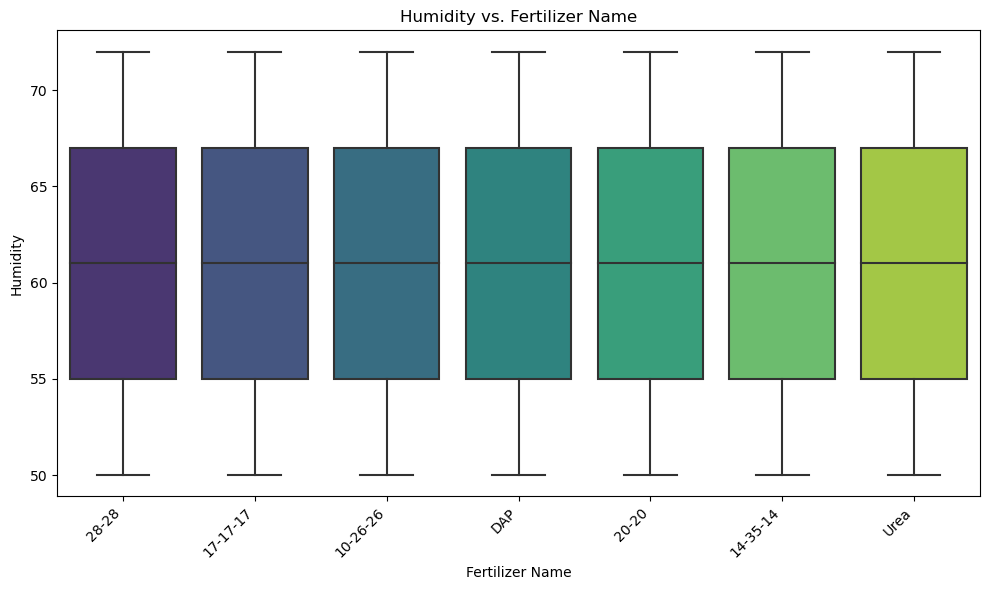

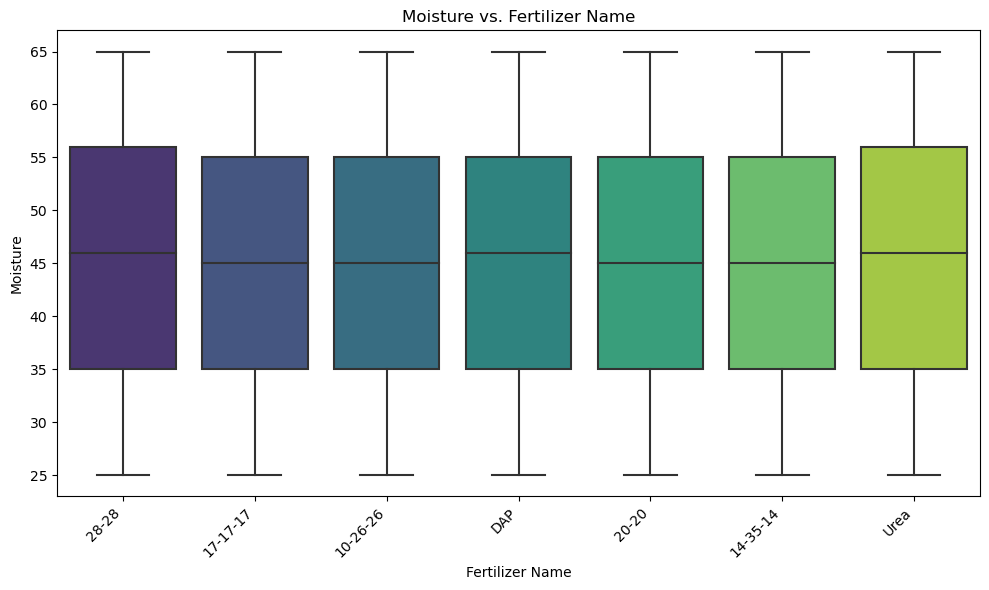

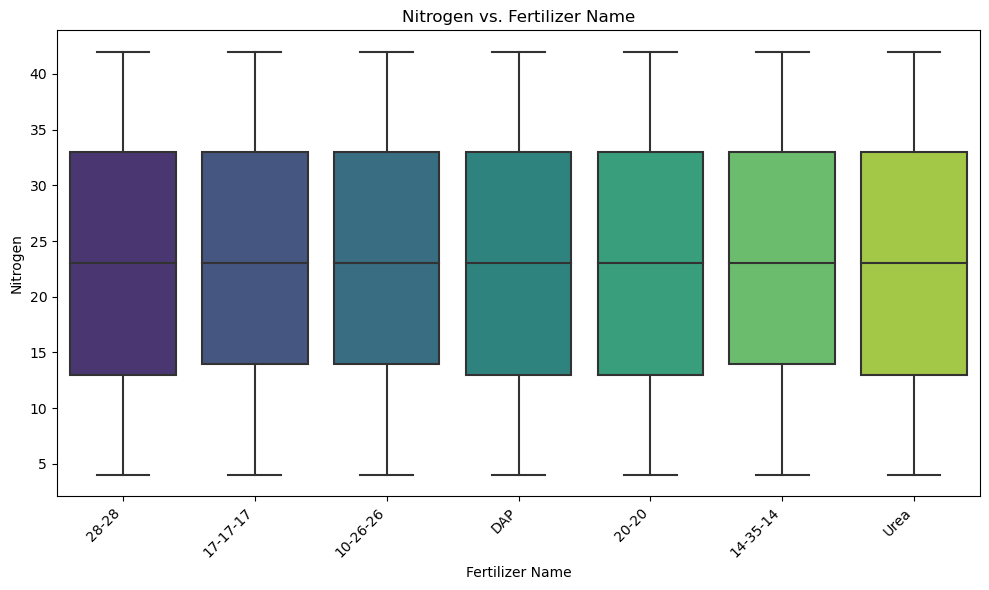

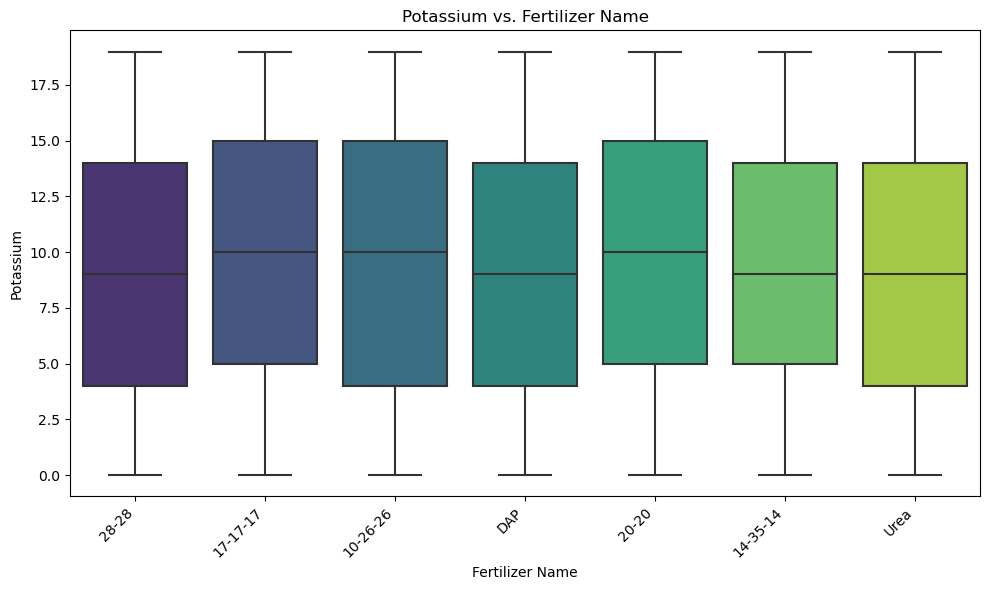

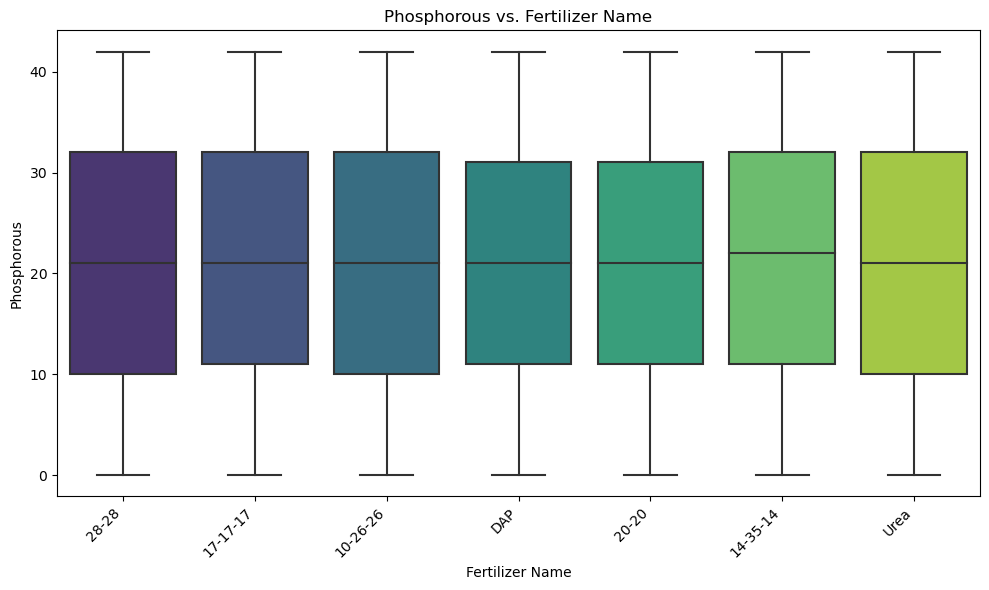

In [15]:
print("\n--- Numerical Features vs. Target Variable ('Fertilizer Name') ---")

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fertilizer Name', y=col, data=train, palette='viridis')
    plt.title(f'{col} vs. Fertilizer Name')
    plt.xlabel('Fertilizer Name')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Categorical Features vs. Target


--- Categorical Input Features vs. Target Variable ('Fertilizer Name') ---

Crosstabulation of 'Soil Type' and 'Fertilizer Name':
Fertilizer Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
Soil Type                                                                
Black               23061     23656     22304  21721  21196  20501  18517
Clayey              23592     22258     22771  22508  22762  17278  17213
Loamy               22822     22571     22249  22138  21522  17476  17072
Red                 21725     22779     22141  21614  21679  19077  19087
Sandy               22687     23172     22988  22908  23999  20528  20428

Proportions of 'Fertilizer Name' by 'Soil Type':
Fertilizer Name  10-26-26  14-35-14  17-17-17     20-20     28-28       DAP  \
Soil Type                                                                     
Black            0.152766  0.156708  0.147752  0.143890  0.140412  0.135808   
Clayey           0.158995  0.150005  0.153462  0.151690  0.15340

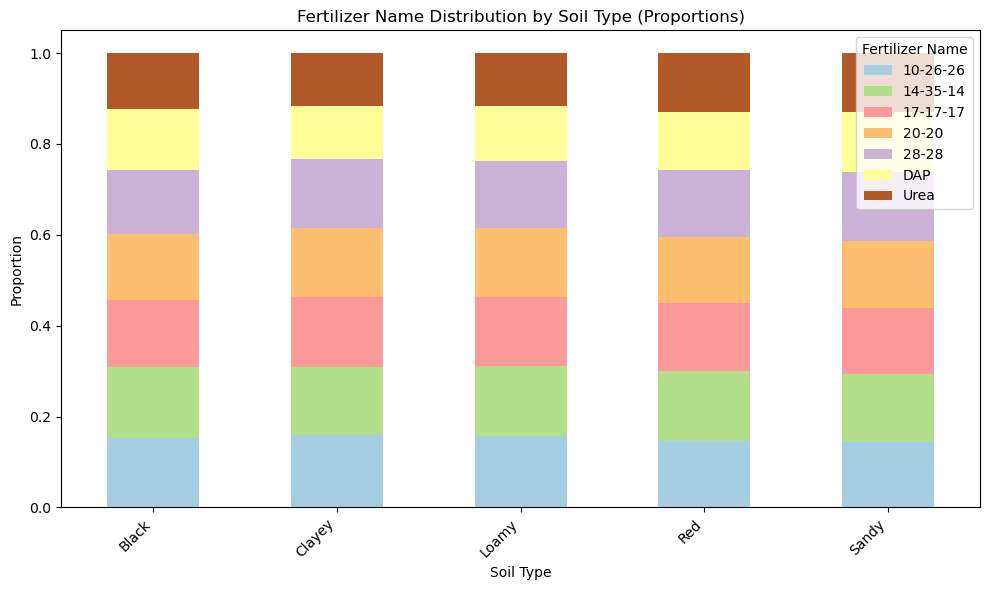


Crosstabulation of 'Crop Type' and 'Fertilizer Name':
Fertilizer Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
Crop Type                                                                
Barley               9447      9809      9901   9500   9684   8068   8636
Cotton              10204      9953     10337  10013   9862   9427   9375
Ground Nuts          9087      9582      9468   9322   9715   6802   6933
Maize                9821      9546      8722   8615   9232   8289   8344
Millets              9300     10121      9494   9541   9916   8148   8771
Oil seeds            9838     10038      9058   9502   9902   8153   7693
Paddy               12812     12651     12661  11580  13264  11828  10958
Pulses              12090     13064     13138  12530  10761   8375   8222
Sugarcane           10399     10410     10003  10331   9902   6910   6314
Tobacco             10522      9952      9959   9747   9764   9694   8362
Wheat               10367      9310      9712  10208   91

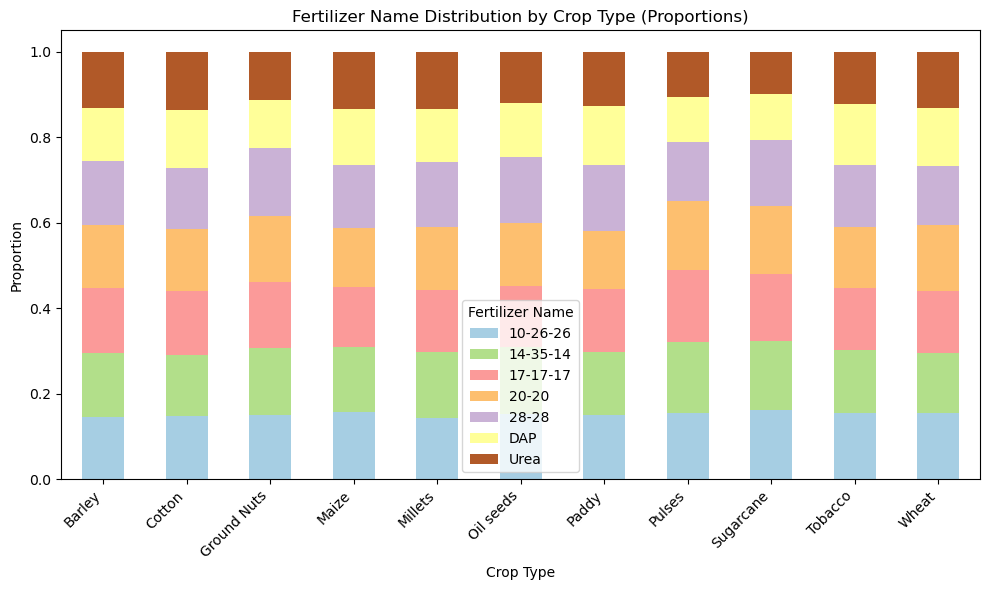

In [16]:
categorical_input_cols = ['Soil Type', 'Crop Type']

print("\n--- Categorical Input Features vs. Target Variable ('Fertilizer Name') ---")

for col in categorical_input_cols:
    print(f"\nCrosstabulation of '{col}' and 'Fertilizer Name':")
    crosstab = pd.crosstab(train[col], train['Fertilizer Name'])
    print(crosstab)

    # Visualize with Stacked Bar Plot (proportions for better comparison)
    crosstab_prop = pd.crosstab(train[col], train['Fertilizer Name'], normalize='index')
    print(f"\nProportions of 'Fertilizer Name' by '{col}':")
    print(crosstab_prop)
    crosstab_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
    plt.title(f'Fertilizer Name Distribution by {col} (Proportions)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Fertilizer Name')
    plt.tight_layout()
    plt.show()